In [ ]:
!python --version

Python 3.10.12


In [ ]:
import pandas as pd

caminho = ''
caminho_desafio = ''

In [ ]:
import plotly.express as px
import plotly.io as pio

pio.templates.default = 'ggplot2'

In [ ]:
from sklearn.compose import make_column_transformer

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
import pickle

# Classifica√ß√£o: Primeiros passos

Neste projeto, iremos analisar dados de uma campanha de marketing para ader√™ncia de investimentos. O intuito √© usar as informa√ß√µes dos dados para prever se os clientes de um banco v√£o aplicar o dinheiro em um investimento ou n√£o.

Essa previs√£o ser√° feita utilizando machine learning e este notebook vai conter os passos para se obter um modelo capaz de realizar as previs√µes, desde a **leitura**, **an√°lise explorat√≥ria**, **separa√ß√£o** e **transforma√ß√£o** dos dados, at√© o **ajuste**, **avalia√ß√£o** e **compara√ß√£o** de modelos de classifica√ß√£o.

# An√°lise explorat√≥ria

## Fazendo a leitura dos dados

Podemos realizar a leitura dos dados a partir da biblioteca `pandas`. Por conta disso, vamos realizar a importa√ß√£o da biblioteca com o comando `import pandas as pd`.

Como o arquivo de dados est√° no formato *csv*, vamos realizar a leitura com a fun√ß√£o [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [ ]:
dados = pd.read_csv(caminho)

In [ ]:
dados.head(10)

idade    estado_civil escolaridade inadimplencia  saldo fez_emprestimo  \
0     45      casado (a)     superior           nao    242            nao   
1     42      casado (a)        medio           nao   1289            nao   
2     23    solteiro (a)     superior           nao    363            nao   
3     58  divorciado (a)     superior           nao   1382            nao   
4     50      casado (a)        medio           nao   3357            nao   
5     24    solteiro (a)        medio           nao    174            sim   
6     53      casado (a)     superior           nao   4446            nao   
7     30      casado (a)        medio           nao    946            nao   
8     39      casado (a)  fundamental           nao    879            nao   
9     30  divorciado (a)        medio           nao    -94            nao   

   tempo_ult_contato  numero_contatos aderencia_investimento  
0                587                1                    sim  
1                250                4                    sim  
2                 16               18                    nao  
3                700                1                    sim  
4                239                4                    sim  
5                487                1                    sim  
6                429                1                    nao  
7               1065                1                    nao  
8                102                2                    nao  
9                 41                2                    nao

Para criar modelos de classifica√ß√£o, precisamos utilizar dados de qualidade, sem inconsist√™ncias e sem dados faltantes. Vamos checar se existem dados nulos e o tipo dos dados de cada coluna na base de dados a partir do m√©todo [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   1268 non-null   int64 
 1   estado_civil            1268 non-null   object
 2   escolaridade            1268 non-null   object
 3   inadimplencia           1268 non-null   object
 4   saldo                   1268 non-null   int64 
 5   fez_emprestimo          1268 non-null   object
 6   tempo_ult_contato       1268 non-null   int64 
 7   numero_contatos         1268 non-null   int64 
 8   aderencia_investimento  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


## Explorando os dados

Uma etapa muito importante em projetos de machine learning √© a explora√ß√£o e entendimento dos dados, conhecida como **an√°lise explorat√≥ria**. Podemos utilizar gr√°ficos para verificar quais s√£o as informa√ß√µes em cada uma das colunas da base de dados, identificar inconsist√™ncias e padr√µes que possam existir.

Vamos explorar cada uma das colunas da base de dados com o uso da biblioteca `plotly`. Vamos come√ßar pelas vari√°veis categ√≥ricas e depois explorar as vari√°veis num√©ricas.

### Vari√°veis categ√≥ricas

In [ ]:
px.histogram(dados, x='aderencia_investimento', text_auto=True)

In [ ]:
px.histogram(dados, x='estado_civil', text_auto=True,
             color='aderencia_investimento', barmode='group')

In [ ]:
px.histogram(dados, x='escolaridade', text_auto=True,
             color='aderencia_investimento', barmode='group')

In [ ]:
px.histogram(dados, x='inadimplencia', text_auto=True,
             color='aderencia_investimento', barmode='group')

In [ ]:
px.histogram(dados, x='fez_emprestimo', text_auto=True,
             color='aderencia_investimento', barmode='group')

### Vari√°veis num√©ricas

In [ ]:
px.box(dados, x='idade', color='aderencia_investimento')

In [ ]:
px.box(dados, x='saldo', color='aderencia_investimento')

In [ ]:
px.box(dados, x='tempo_ult_contato', color='aderencia_investimento')

In [ ]:
px.box(dados, x='numero_contatos', color='aderencia_investimento')

# Desafios 1

### Desafio 1:

A primeira etapa em um projeto de machine learning √© a obten√ß√£o de dados. A partir dessa obten√ß√£o, podemos fazer a leitura dos dados para se construir um modelo. Como tarefa inicial, fa√ßa a leitura da base de dados e verifique a presen√ßa de dados nulos.

In [ ]:
dados_desafio = pd.read_csv(caminho_desafio)

In [ ]:
dados_desafio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_cliente           10000 non-null  int64  
 1   score_credito        10000 non-null  int64  
 2   pais                 10000 non-null  object 
 3   sexo_biologico       10000 non-null  object 
 4   idade                10000 non-null  int64  
 5   anos_de_cliente      10000 non-null  int64  
 6   saldo                10000 non-null  float64
 7   servicos_adquiridos  10000 non-null  int64  
 8   tem_cartao_credito   10000 non-null  int64  
 9   membro_ativo         10000 non-null  int64  
 10  salario_estimado     10000 non-null  float64
 11  churn                10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
dados_desafio = dados_desafio.drop(columns='id_cliente', axis='columns')

In [ ]:
dados_desafio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   score_credito        10000 non-null  int64  
 1   pais                 10000 non-null  object 
 2   sexo_biologico       10000 non-null  object 
 3   idade                10000 non-null  int64  
 4   anos_de_cliente      10000 non-null  int64  
 5   saldo                10000 non-null  float64
 6   servicos_adquiridos  10000 non-null  int64  
 7   tem_cartao_credito   10000 non-null  int64  
 8   membro_ativo         10000 non-null  int64  
 9   salario_estimado     10000 non-null  float64
 10  churn                10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
dados_desafio.head(10)

score_credito      pais sexo_biologico  idade  anos_de_cliente      saldo  \
0            619    Fran√ßa         Mulher     42                2       0.00   
1            608   Espanha         Mulher     41                1   83807.86   
2            502    Fran√ßa         Mulher     42                8  159660.80   
3            699    Fran√ßa         Mulher     39                1       0.00   
4            850   Espanha         Mulher     43                2  125510.82   
5            645   Espanha          Homem     44                8  113755.78   
6            822    Fran√ßa          Homem     50                7       0.00   
7            376  Alemanha         Mulher     29                4  115046.74   
8            501    Fran√ßa          Homem     44                4  142051.07   
9            684    Fran√ßa          Homem     27                2  134603.88   

   servicos_adquiridos  tem_cartao_credito  membro_ativo  salario_estimado  \
0                    1                   1             1         101348.88   
1                    1                   0             1         112542.58   
2                    3                   1             0         113931.57   
3                    2                   0             0          93826.63   
4                    1                   1             1          79084.10   
5                    2                   1             0         149756.71   
6                    2                   1             1          10062.80   
7                    4                   1             0         119346.88   
8                    2                   0             1          74940.50   
9                    1                   1             1          71725.73   

   churn  
0      1  
1      0  
2      1  
3      0  
4      0  
5      1  
6      0  
7      1  
8      0  
9      0

### Desafio 2

Ap√≥s a leitura dos dados, √© importante conhecer os dados, checando inconsist√™ncias e entendendo o comportamento de cada uma das colunas. Nesta tarefa, fa√ßa uma an√°lise explorat√≥ria utilizando gr√°ficos para as **vari√°veis categ√≥ricas** da base de dados, incluindo a **vari√°vel alvo** churn. Para essas vari√°veis, pode ser utilizado gr√°ficos de barras para fazer a contagem das categorias e fazer um agrupamento por cores de acordo com as categorias da vari√°vel alvo.

In [ ]:
px.pie(dados_desafio, names='churn')

In [ ]:
px.histogram(dados_desafio, x='pais', text_auto=True,
             color='churn', barmode='group')

In [ ]:
px.histogram(dados_desafio, x='sexo_biologico',
             text_auto=True, color='churn', barmode='group')

In [ ]:
px.histogram(dados_desafio, x='tem_cartao_credito',
             text_auto=True, color='churn', barmode='group')

In [ ]:
px.histogram(dados_desafio, x='membro_ativo',
             text_auto=True, color='churn', barmode='group')

### Desafio 3

Depois de explorar as vari√°veis categ√≥ricas, chegou a vez das **vari√°veis num√©ricas**. Construa gr√°ficos de distribui√ß√£o como boxplots ou histogramas para analisar o comportamento dos valores num√©ricos e checar se existem valores inconsistentes.

In [ ]:
px.box(dados_desafio, x='score_credito', color='churn')

In [ ]:
px.box(dados_desafio, x='idade', color='churn')

In [ ]:
px.box(dados_desafio, x='anos_de_cliente', color='churn')

In [ ]:
px.box(dados_desafio, x='saldo', color='churn')

In [ ]:
px.box(dados_desafio, x='servicos_adquiridos', color='churn')

In [ ]:
px.box(dados_desafio, x='salario_estimado', color='churn')

# Transforma√ß√£o de dados

## Vari√°veis explicativas e vari√°vel alvo

Para fazer a previs√£o dos valores com um modelo de machine learning, precisamos fazer a separa√ß√£o da vari√°vel alvo e vari√°veis explicativas. O y representa a vari√°vel que queremos prever, enquanto x representa todas as vari√°veis que ser√£o utilizadas para explicar o comportamento de **y**.

In [ ]:
x = dados.drop(columns='aderencia_investimento', axis='columns')

In [ ]:
y = dados['aderencia_investimento']

## Transformando as vari√°veis explicativas

Os algoritmos de machine learning n√£o compreendem dados no formato de texto, portanto devemos fazer transforma√ß√µes nos dados para o formato num√©rico para que o algoritmo consiga compreender as informa√ß√µes. Essa transforma√ß√£o precisa ser feita de forma que n√£o altere a informa√ß√£o original do conjunto de dados, portanto n√£o basta simplesmente alterar os valores para valores num√©ricos aleat√≥rios.

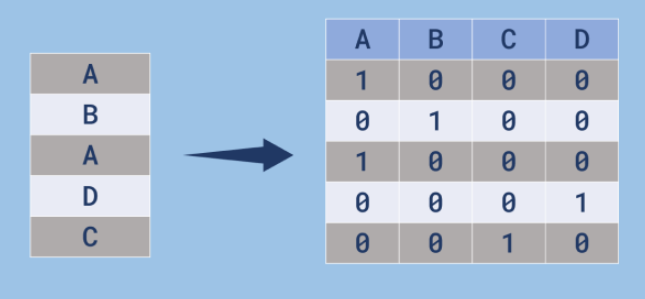

Existe uma forma bem simples de fazer essa transforma√ß√£o usando a biblioteca pandas, a partir da fun√ß√£o pd.get_dummies(), por√©m n√£o √© uma maneira muito recomendada quando estamos trabalhando com Machine Learning, uma vez que essa fun√ß√£o n√£o consegue abstrair e executar a mesma transforma√ß√£o para um novo dado. Caso voc√™ tenha uma nova informa√ß√£o que pertence apenas a uma das classes de uma vari√°vel alvo, o processo do get_dummies n√£o ser√° capaz de gerar as outras colunas provenientes das outras classes. Isso torna um problema para o modelo, uma vez que ele espera todas as caracter√≠sticas para realizar uma previs√£o.

O m√©todo mais recomendado para realizar a transforma√ß√£o em projetos de Machine Learning √© o OneHotEnconder. Em um primeiro momento, com os dados iniciais, ele inicia a sua a√ß√£o compreendendo as caracter√≠sticas dos dados e gera as novas colunas para cada classe. Al√©m disso, armazena a regra capaz de fazer esse procedimento para novos dados. Portanto, no processo de transforma√ß√£o de um novo dado, ele consegue criar todas as colunas necess√°rias, por mais que esse novo dado tenha apenas a informa√ß√£o de uma das classes.

In [ ]:
display(x['estado_civil'].unique())
display(x['escolaridade'].unique())
display(x['inadimplencia'].unique())
display(x['fez_emprestimo'].unique())

array(['casado (a)', 'solteiro (a)', 'divorciado (a)'], dtype=object)

array(['superior', 'medio', 'fundamental'], dtype=object)

array(['nao', 'sim'], dtype=object)

array(['nao', 'sim'], dtype=object)

In [ ]:
colunas = x.columns

In [ ]:
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'), [
                                  'estado_civil', 'escolaridade', 'inadimplencia', 'fez_emprestimo']), remainder='passthrough', sparse_threshold=0)

In [ ]:
x = one_hot.fit_transform(x)

In [ ]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_solteiro (a)',
       'onehotencoder__escolaridade_fundamental',
       'onehotencoder__escolaridade_medio',
       'onehotencoder__escolaridade_superior',
       'onehotencoder__inadimplencia_sim',
       'onehotencoder__fez_emprestimo_sim', 'remainder__idade',
       'remainder__saldo', 'remainder__tempo_ult_contato',
       'remainder__numero_contatos'], dtype=object)

In [ ]:
pd.DataFrame(x, columns=one_hot.get_feature_names_out(colunas))

onehotencoder__estado_civil_casado (a)  \
0                                        1.0   
1                                        1.0   
2                                        0.0   
3                                        0.0   
4                                        1.0   
...                                      ...   
1263                                     0.0   
1264                                     0.0   
1265                                     0.0   
1266                                     1.0   
1267                                     0.0   

      onehotencoder__estado_civil_divorciado (a)  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            1.0   
4                                            0.0   
...                                          ...   
1263                                         0.0   
1264                                         0.0   
1265                                         0.0   
1266                                         0.0   
1267                                         0.0   

      onehotencoder__estado_civil_solteiro (a)  \
0                                          0.0   
1                                          0.0   
2                                          1.0   
3                                          0.0   
4                                          0.0   
...                                        ...   
1263                                       1.0   
1264                                       1.0   
1265                                       1.0   
1266                                       0.0   
1267                                       1.0   

      onehotencoder__escolaridade_fundamental  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   
...                                       ...   
1263                                      0.0   
1264                                      0.0   
1265                                      0.0   
1266                                      0.0   
1267                                      0.0   

      onehotencoder__escolaridade_medio  onehotencoder__escolaridade_superior  \
0                                   0.0                                   1.0   
1                                   1.0                                   0.0   
2                                   0.0                                   1.0   
3                                   0.0                                   1.0   
4                                   1.0                                   0.0   
...                                 ...                                   ...   
1263                                0.0                                   1.0   
1264                                0.0                                   1.0   
1265                                0.0                                   1.0   
1266                                0.0                                   1.0   
1267                                0.0                                   1.0   

      onehotencoder__inadimplencia_sim  onehotencoder__fez_emprestimo_sim  \
0                                  0.0                                0.0   
1                                  0.0                                0.0   
2                                  0.0                                0.0   
3                                  0.0                                0.0   
4                                  0.0                                0.0   
...                                ...                                ...   
1263                               0.0                                0.0   
1264                     

## Transformando a vari√°vel alvo

Assim como as vari√°veis explicativas, a vari√°vel alvo tamb√©m precisa ser alterada para o formato num√©rico. Podemos representar uma vari√°vel alvo bin√°ria como 0 ou 1, onde 0 indica aus√™ncia da caracter√≠stica da vari√°vel e 1 representa a presen√ßa da caracter√≠stica.

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
y = label_encoder.fit_transform(y)

In [ ]:
y

array([1, 1, 0, ..., 1, 1, 1])

# Desafios 2

### Desafio 1:

Para utilizar os dados nos algoritmos de Machine Learning, precisamos informar quais s√£o as vari√°veis explicativas e qual √© a vari√°vel alvo. Neste desafio, fa√ßa a separa√ß√£o da base de dados de churn entre as vari√°veis explicativas, armazenando em uma vari√°vel x e a vari√°vel alvo em y.


In [ ]:
x_desafio = dados_desafio.drop('churn', axis='columns')

In [ ]:
y_desafio = dados_desafio['churn']

### Desafio 2:

Vari√°veis categ√≥ricas que estejam em formato de texto n√£o podem ser utilizadas diretamente nos modelos de Machine Learning. Neste desafio, fa√ßa a transforma√ß√£o das vari√°veis categ√≥ricas para formato num√©rico usando o [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), utilizando o par√¢metro `drop='if_binary'` caso alguma vari√°vel tenha apenas 2 categorias.

In [ ]:
x_desafio.columns

Index(['score_credito', 'pais', 'sexo_biologico', 'idade', 'anos_de_cliente',
       'saldo', 'servicos_adquiridos', 'tem_cartao_credito', 'membro_ativo',
       'salario_estimado'],
      dtype='object')

In [ ]:
display(x_desafio['pais'].unique())
display(x_desafio['sexo_biologico'].unique())
display(x_desafio['tem_cartao_credito'].unique())
display(x_desafio['membro_ativo'].unique())

array(['Fran√ßa', 'Espanha', 'Alemanha'], dtype=object)

array(['Mulher', 'Homem'], dtype=object)

array([1, 0])

array([1, 0])

In [ ]:
one_hot_desafio = make_column_transformer((OneHotEncoder(drop='if_binary'), [
                                          'pais', 'sexo_biologico', 'tem_cartao_credito', 'membro_ativo']), remainder='passthrough', sparse_threshold=0)

In [ ]:
x_desafio = one_hot_desafio.fit_transform(x_desafio)

### Desafio 3:

A vari√°vel alvo, como √© do tipo categ√≥rica, tamb√©m precisa passar por um tratamento similar √†s vari√°veis explicativas categ√≥ricas para que possa ser usada nos algoritmos. Nessa tarefa, utilize o m√©todo [`LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) para fazer a transforma√ß√£o da vari√°vel churn.

In [ ]:
label_encoder_desafio = LabelEncoder()

In [ ]:
y_desafio = label_encoder_desafio.fit_transform(y_desafio)

# Ajustando modelos

## Dividindo os dados entre treino e teste

Para compreender se o modelo est√° de fato aprendendo com os dados, precisamos fazer uma separa√ß√£o dos dados entre treinamento e teste. Os dados de **treinamento** s√£o usados para ajustar o modelo, enquanto os dados de **teste** servem para verificar o aprendizado do modelo em dados que n√£o foram utilizados no momento do ajuste.

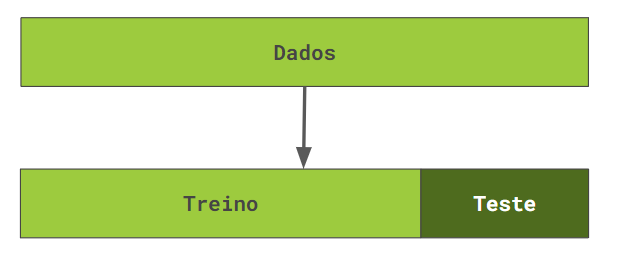

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(
    x, y, stratify=y, random_state=5)

Existem dois conceitos que est√£o muito ligados a essa divis√£o dos dados e que s√£o muito relevantes nos projetos de machine learning: o overfitting e underfitting.

**Overfitting (Sobreajuste)**:

O overfitting ocorre quando um modelo se ajusta demais aos dados de treinamento. Isso indica que o modelo capturou n√£o s√≥ o padr√£o dos dados, mas tamb√©m ru√≠dos e varia√ß√µes aleat√≥rias que est√£o presentes nos dados usados para treinamento. Como resultado disso, o modelo tem um resultado muito bom ao ser avaliado com os dados de treinamento, por√©m seu desempenho nos dados de teste ou em dados novos cai consideravelmente.

Caracter√≠sticas do overfitting:

* Erro muito baixo nas predi√ß√µes em dados de treinamento;
* Erro muito alto nas predi√ß√µes em dados de teste;
* Modelo muito complexo que tenta memorizar os dados de treinamento ao inv√©s de aprender o padr√£o dos dados.

**Underfitting (Subajuste)**:

O underfitting ocorre quando um modelo √© muito simples e n√£o consegue capturar o padr√£o presente nos dados. Isso indica que o modelo n√£o foi capaz de aprender os relacionamentos existentes nos dados de treinamento e acaba tendo um desempenho ruim tanto em dados de treinamento quanto de teste.

Caracter√≠sticas do underfitting:

* Erro muito alto nas predi√ß√µes em dados de treinamento;
* Erro muito alto nas predi√ß√µes em dados de teste;
* Modelo muito simples que n√£o consegue representar bem os dados.

ü§ñ Em um contexto de machine learning, ru√≠do refere-se a informa√ß√µes irrelevantes, aleat√≥rias ou imprecisas presentes nos dados de treinamento. Esses ru√≠dos podem ser causados por uma variedade de fatores, como erros de medi√ß√£o, dados corrompidos, amostras at√≠picas ou at√© mesmo inconsist√™ncias nos dados coletados.

ü§ñ Quando um modelo de machine learning √© exposto a ru√≠dos excessivos durante o treinamento, ele pode aprender padr√µes falsos ou irrelevantes, resultando em um fen√¥meno conhecido como overfitting.

O objetivo principal da cria√ß√£o de modelos de machine learning √© encontrar um equil√≠brio entre o overfitting e underfitting, para que tenha um ajuste adequado. Um modelo bem ajustado √© capaz de aprender o padr√£o dos dados e generalizar para novos dados, fazendo predi√ß√µes com consist√™ncia sem que seja muito influenciado pelos ru√≠dos presentes nos dados de treinamento.

## Modelo de base

O modelo mais simples de classificar os dados √© simplesmente utilizar um algoritmo que chuta todas as classifica√ß√µes para a classe que tem maior frequ√™ncia. Esse algoritmo serve como um crit√©rio de compara√ß√£o, para identificar se os outros modelos tem um desempenho melhor do que a classifica√ß√£o mais simples poss√≠vel.

In [ ]:
dummy = DummyClassifier()
dummy.fit(x_treino, y_treino)
dummy.score(x_teste, y_teste)

0.6025236593059937

## √Årvore de decis√£o

O modelo de √°rvore de decis√£o √© muito utilizado pela sua alta **explicabilidade** e **processamento r√°pido**, mantendo um desempenho bem interessante.

Ele se baseia em decis√µes simples tomadas pelo algoritmo, separando os dados com base em compara√ß√µes de **menor** e **maior** nos valores das colunas da base de dados.

In [ ]:
√°rvore = DecisionTreeClassifier(random_state=5)
√°rvore.fit(x_treino, y_treino)

DecisionTreeClassifier(random_state=5)

In [ ]:
√°rvore.predict(x_teste)

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [ ]:
√°rvore.score(x_teste, y_teste)

0.6656151419558359

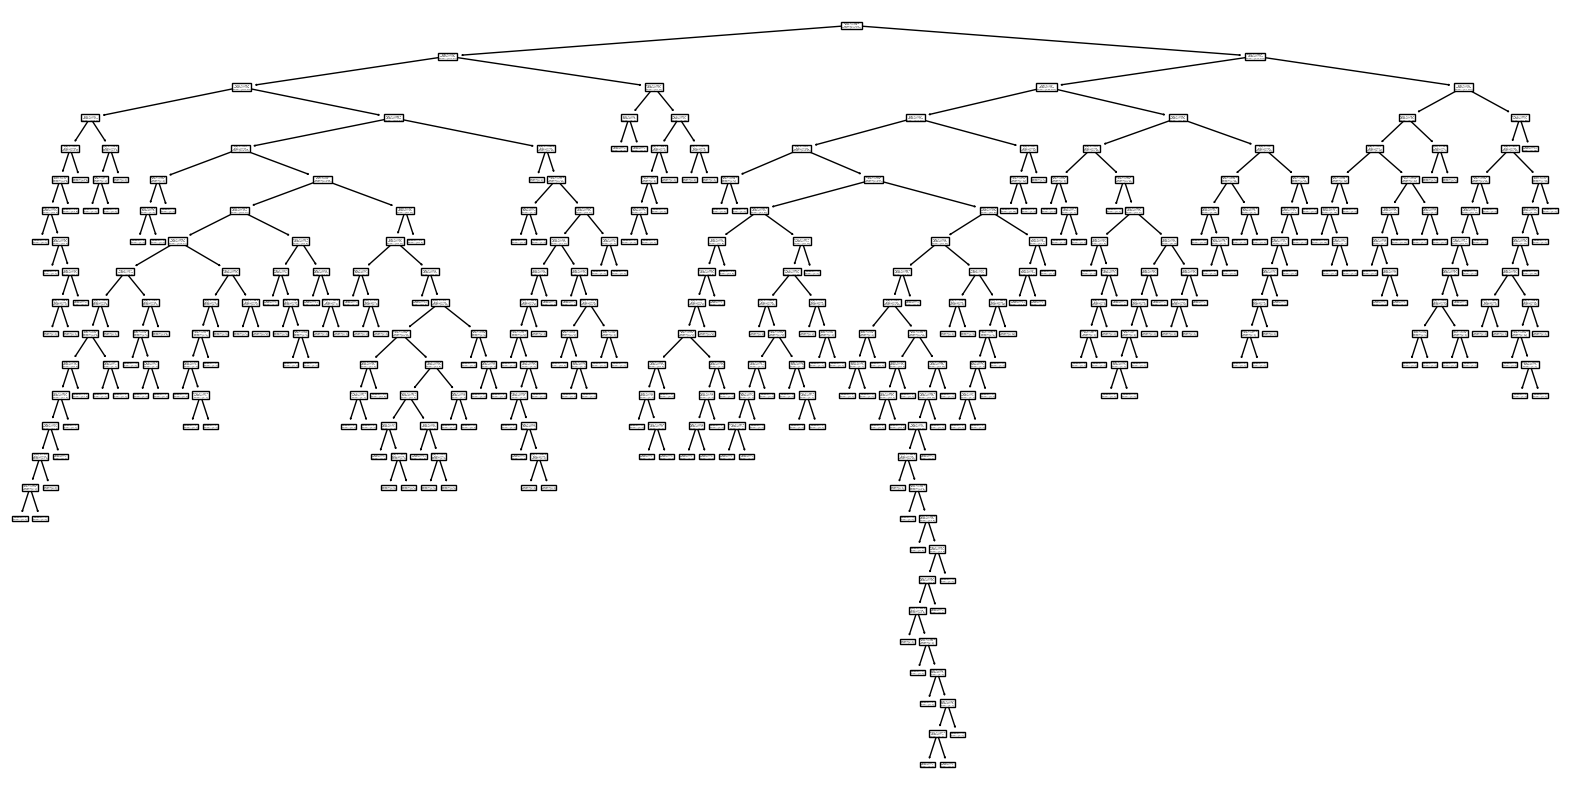

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(√°rvore)

In [ ]:
# overfitting
√°rvore.score(x_treino, y_treino)

1.0

In [ ]:
# podando a √°rvore com max_depth
√°rvore = DecisionTreeClassifier(random_state=5, max_depth=3)
√°rvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [ ]:
√°rvore.score(x_treino, y_treino)

0.7613038906414301

In [ ]:
√°rvore.score(x_teste, y_teste)

0.7160883280757098

In [ ]:
_ = ['casado (a)',
     'divorciado (a)',
     'solteiro (a)',
     'fundamental',
     'medio',
     'superior',
     'inadimplencia',
     'fez_emprestimo',
     'idade',
     'saldo',
     'tempo_ult_contato',
     'numero_contatos']

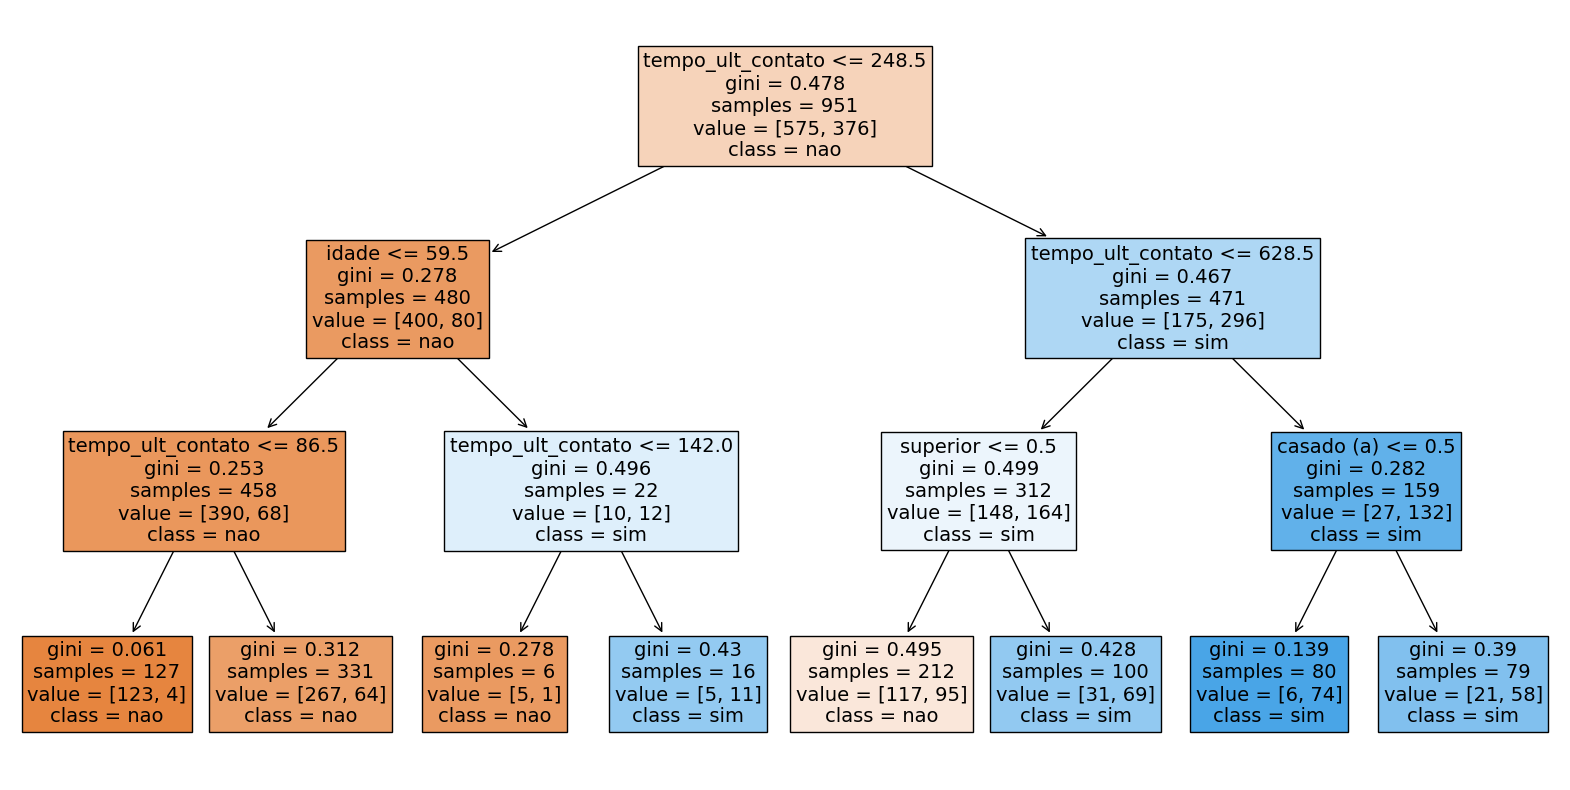

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(√°rvore, filled=True, class_names=[
          'nao', 'sim'], feature_names=_, fontsize=14)

# Desafios 3

### Desafio 1:

A separa√ß√£o dos dados entre conjunto de treinamento e teste √© essencial para compreender se um modelo est√° conseguindo aprender os padr√µes e generalizar para novos dados. Nesta tarefa, fa√ßa a divis√£o da base de dados entre treinamento e teste de forma estratificada.

In [ ]:
x_treino_desafio, x_teste_desafio, y_treino_desafio, y_teste_desafio = train_test_split(
    x_desafio, y_desafio, stratify=y_desafio, random_state=5)

### Desafio 2:

Um modelo de base √© muito importante para definir um crit√©rio de compara√ß√£o para modelos mais complexos. Nesta etapa, crie um modelo de base com o `DummyClassifier` e encontre a taxa de acerto com o m√©todo `score`.

In [ ]:
dummy_desafio = DummyClassifier()
dummy_desafio.fit(x_treino_desafio, y_treino_desafio)
dummy_desafio.score(x_teste_desafio, y_teste_desafio)

0.7964

### Desafio 3:

A √°rvore de decis√£o √© um algoritmo que faz as classifica√ß√µes a partir de decis√µes simples tomadas a partir dos dados. Temos que tomar certo cuidado para n√£o utilizar uma profundidade muito grande, porque isso pode provocar um sobreajuste do modelo aos dados de treinamento. Neste desafio, crie um modelo de √°rvore de decis√£o com o par√¢metro `max_depth=4`, avalie o desempenho do modelo nos dados de teste e visualize as decis√µes da √°rvore usando o m√©todo `plot_tree`.

In [ ]:
√°rvore_desafio = DecisionTreeClassifier(random_state=5, max_depth=4)
√°rvore_desafio.fit(x_treino_desafio, y_treino_desafio)

DecisionTreeClassifier(max_depth=4, random_state=5)

In [ ]:
√°rvore_desafio.score(x_treino_desafio, y_treino_desafio)

0.8509333333333333

In [ ]:
√°rvore_desafio.score(x_teste_desafio, y_teste_desafio)

0.8464

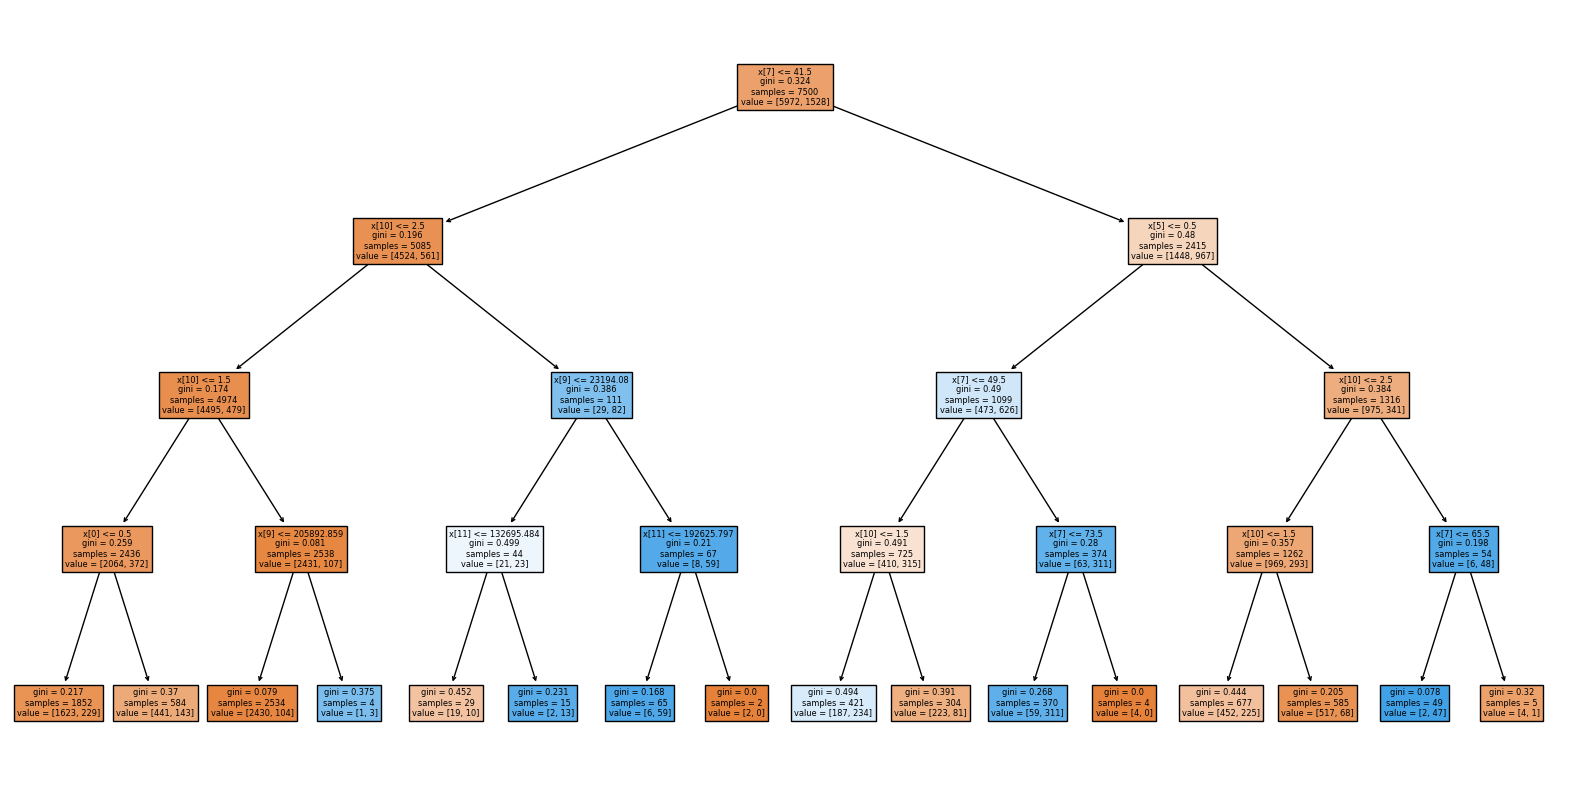

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(√°rvore_desafio, filled=True)

# Sele√ß√£o de modelos

## Normalizando os dados

Alguns algoritmos podem atribuir um peso maior aos valores das vari√°veis devido a escala dos valores e n√£o pela import√¢ncia da classifica√ß√£o da vari√°vel alvo. Por exemplo, em uma base de dados com a colunas **idade** e **sal√°rio**, o algoritmo pode dar um peso de decis√£o maior para os valores do sal√°rio simplesmente por estar em uma escala maior do que os valores de idade, e n√£o porque a vari√°vel sal√°rio √© mais importante do que a vari√°vel idade.

Nesses casos, precisamos fazer uma transforma√ß√£o nos dados para que fiquem em uma mesma escala, fazendo com que o algoritmo n√£o seja influenciado incorretamente pelos valores num√©ricos divergentes entre as vari√°veis.

$X_{sc} = \frac{X - X_{min}}{X_{max} - X_{min}} $

In [ ]:
normaliza√ß√£o = MinMaxScaler()
x_treino_normalizado = normaliza√ß√£o.fit_transform(x_treino)

In [ ]:
pd.DataFrame(x_treino_normalizado).head(10)

0    1    2    3    4    5    6    7         8         9         10  \
0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.205882  0.065564  0.123734   
1  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.147059  0.045792  0.396527   
2  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.338235  0.076036  0.335022   
3  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.573529  0.062866  0.315123   
4  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.338235  0.148380  0.065847   
5  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.500000  0.046147  0.176556   
6  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.161765  0.028859  0.155572   
7  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.220588  0.042810  0.057164   
8  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.205882  0.128394  0.045224   
9  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.338235  0.081147  0.342258   

         11  
0  0.032258  
1  0.032258  
2  0.000000  
3  0.000000  
4  0.129032  
5  0.000000  
6  0.000000  
7  0.032258  
8  0.000000  
9  0.064516

## KNN

O algoritmo KNN se baseia no c√°lculo de dist√¢ncia entre os registros da base de dados e busca elementos que estejam pr√≥ximos uns dos outros (vizinhos) para tomar a decis√£o da classifica√ß√£o.

Por conta de usar c√°lculos de dist√¢ncia, esse algoritmo √© influenciado pela escala das vari√°veis e por conta disso √© necess√°rio uma transforma√ß√£o nos dados antes de utilizar esse m√©todo.

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(x_treino_normalizado, y_treino)

KNeighborsClassifier()

In [ ]:
# sem fit
x_teste_normalizado = normaliza√ß√£o.transform(x_teste)

In [ ]:
knn.score(x_teste_normalizado, y_teste)

0.6876971608832808

## Escolhendo e salvando o melhor modelo

Ao final de um projeto de machine learning, devemos comparar os resultados dos modelos e escolher aquele que tenha o melhor desempenho.

Podemos armazenar o modelo em um arquivo serializado do tipo pickle para que seja utilizado em produ√ß√£o, ou seja, em dados do mundo real para atender as necessidades do problema que precisa ser resolvido.

In [ ]:
f'acur√°cia dummy: {dummy.score(x_teste, y_teste)}'

'acur√°cia dummy: 0.6025236593059937'

In [ ]:
f'acur√°cia dummy normalizado: {dummy.score(x_teste_normalizado, y_teste)}'

'acur√°cia dummy normalizado: 0.6025236593059937'

In [ ]:
f'acur√°cia √°rvore: {√°rvore.score(x_teste, y_teste)}'

'acur√°cia √°rvore: 0.7160883280757098'

In [ ]:
f'acur√°cia √°rvore normalizado: {√°rvore.score(x_teste_normalizado, y_teste)}'

'acur√°cia √°rvore normalizado: 0.6025236593059937'

In [ ]:
f'acur√°cia knn: {knn.score(x_teste_normalizado, y_teste)}'

'acur√°cia knn: 0.6876971608832808'

In [ ]:
with open('modelo_onehotenc.pkl', 'wb') as a:
  pickle.dump(one_hot, a)

In [ ]:
!ls

classificacao-churn.csv			  modelo_√°rvore.pkl	sample_data
classificacao-marketing-investimento.csv  modelo_onehotenc.pkl


In [ ]:
with open('modelo_√°rvore.pkl', 'wb') as a:
  pickle.dump(√°rvore, a)

In [ ]:
!ls

classificacao-churn.csv			  modelo_√°rvore.pkl	sample_data
classificacao-marketing-investimento.csv  modelo_onehotenc.pkl


## Testando o melhor modelo com uma entrada in√©dita

In [ ]:
dados.columns

Index(['idade', 'estado_civil', 'escolaridade', 'inadimplencia', 'saldo',
       'fez_emprestimo', 'tempo_ult_contato', 'numero_contatos',
       'aderencia_investimento'],
      dtype='object')

In [ ]:
novo_dado = {'idade': [45],
             'estado_civil': ['solteiro (a)'],
             'escolaridade': ['superior'],
             'inadimplencia': ['nao'],
             'saldo': [23040],
             'fez_emprestimo': ['nao'],
             'tempo_ult_contato': [800],
             'numero_contatos': [4]}

In [ ]:
novo_dado = pd.DataFrame(novo_dado)
novo_dado

idade  estado_civil escolaridade inadimplencia  saldo fez_emprestimo  \
0     45  solteiro (a)     superior           nao  23040            nao   

   tempo_ult_contato  numero_contatos  
0                800                4

In [ ]:
modelo_onehotenc = pd.read_pickle('/content/modelo_onehotenc.pkl')
modelo_√°rvore = pd.read_pickle('/content/modelo_√°rvore.pkl')

In [ ]:
novo_dado = modelo_onehotenc.transform(novo_dado)
novo_dado

array([[0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 4.500e+01, 2.304e+04, 8.000e+02, 4.000e+00]])

In [ ]:
modelo_√°rvore.predict(novo_dado)

array([1])

Com base no nosso modelo de √°rvore de decis√£o, esse cliente aderir√° ao investimento.

# Desafios 4

### Desafio 1:

A normaliza√ß√£o de dados √© uma tarefa importante para manter todos os valores num√©ricos em uma mesma escala e garantir que todas as caracter√≠sticas tenham o mesmo impacto no modelo. Nesta tarefa, fa√ßa a normaliza√ß√£o da base de dados usando o [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).


In [ ]:
normaliza√ß√£o = MinMaxScaler()
x_treino_desafio_normalizado = normaliza√ß√£o.fit_transform(x_treino_desafio)

In [ ]:
pd.DataFrame(x_treino_desafio_normalizado)

0    1    2    3    4    5      6         7    8         9         10  \
0     0.0  0.0  1.0  1.0  1.0  0.0  0.796  0.216216  0.8  0.000000  0.333333   
1     0.0  0.0  1.0  0.0  0.0  1.0  0.612  0.256757  0.2  0.000000  0.333333   
2     1.0  0.0  0.0  1.0  1.0  0.0  0.634  0.256757  0.5  0.386645  0.666667   
3     0.0  0.0  1.0  1.0  1.0  0.0  0.514  0.040541  0.0  0.000000  0.333333   
4     0.0  1.0  0.0  1.0  0.0  1.0  0.374  0.270270  0.6  0.594774  0.000000   
...   ...  ...  ...  ...  ...  ...    ...       ...  ...       ...       ...   
7495  1.0  0.0  0.0  0.0  1.0  0.0  0.590  0.391892  0.9  0.637940  0.000000   
7496  0.0  1.0  0.0  1.0  1.0  0.0  0.676  0.229730  0.6  0.000000  0.000000   
7497  0.0  1.0  0.0  1.0  1.0  0.0  0.646  0.229730  0.6  0.000000  0.333333   
7498  0.0  0.0  1.0  1.0  1.0  0.0  0.720  0.202703  0.2  0.000000  0.333333   
7499  0.0  0.0  1.0  0.0  1.0  0.0  0.680  0.202703  0.5  0.000000  0.333333   

            11  
0     0.267600  
1     0.338919  
2     0.890516  
3     0.580365  
4     0.738898  
...        ...  
7495  0.609048  
7496  0.127054  
7497  0.492884  
7498  0.364454  
7499  0.689975  

[7500 rows x 12 columns]

### Desafio 2:

Com os dados normalizados, podemos utilizar o modelo KNN, que faz c√°lculos de dist√¢ncia para encontrar os vizinhos mais pr√≥ximos. Nesta atividade, crie um modelo KNN usando o [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) com os dados normalizados e avalie o desempenho nos dados de teste, tamb√©m normalizados.

In [ ]:
knn_desafio = KNeighborsClassifier()
knn_desafio.fit(x_treino_desafio_normalizado, y_treino_desafio)

KNeighborsClassifier()

In [ ]:
x_teste_desafio_normalizado = normaliza√ß√£o.transform(x_teste_desafio)

In [ ]:
knn_desafio.score(x_teste_desafio_normalizado, y_teste_desafio)

0.8172

### Desafio 3:

Ap√≥s a constru√ß√£o dos modelos, √© o momento de comparar os resultados e selecionar aquele que tem o melhor desempenho. Neste desafio, avalie a taxa de acerto dos modelos `DummyClassifier`, `DecisionTreeClassifier` e `KNeighborsClassifier` que foram constru√≠dos nos outros desafios utilizando o m√©todo `score` e depois armazene o modelo com melhor acur√°cia em um arquivo `pickle`. Os modelos de transforma√ß√£o tamb√©m precisam ser armazenados, que √© o caso do `OneHotEncoder` e do `MinMaxScaler`, caso o KNN tenha o melhor desempenho.

In [ ]:
print(f'Acur√°cia Dummy Desafio: {
      dummy_desafio.score(x_teste_desafio, y_teste_desafio)}')

Acur√°cia Dummy Desafio: 0.7964


In [ ]:
print(f'Acur√°cia √Årvore Desafio: {
      √°rvore_desafio.score(x_teste_desafio, y_teste_desafio)}')

Acur√°cia √Årvore Desafio: 0.8464


In [ ]:
print(f'Acur√°cia KNN Desafio: {knn_desafio.score(
    x_teste_desafio_normalizado, y_teste_desafio)}')

Acur√°cia KNN Desafio: 0.8172
